100%|██████████| 93/93 [00:08<00:00, 10.93it/s]


Total samples processed: 0
Phi angle distribution: [175, 364, 693, 1151, 1782, 2159, 2299, 2685, 3407, 4371, 6620, 9897, 4535, 740, 129, 36, 14, 11, 20, 4, 13, 52, 130, 355, 333, 288, 244, 131, 83, 63, 49, 37, 32, 48, 55, 95]
Psi angle distribution: [583, 284, 164, 96, 73, 74, 65, 58, 60, 87, 125, 335, 1192, 4787, 4038, 2065, 1563, 1093, 832, 569, 442, 366, 327, 286, 303, 339, 386, 548, 878, 1650, 3083, 4295, 4621, 4009, 2385, 1039]


/tmp/ipykernel_46275/3506274931.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bins, rotation=90)
/tmp/ipykernel_46275/3506274931.py:150: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bins, rotation=90)


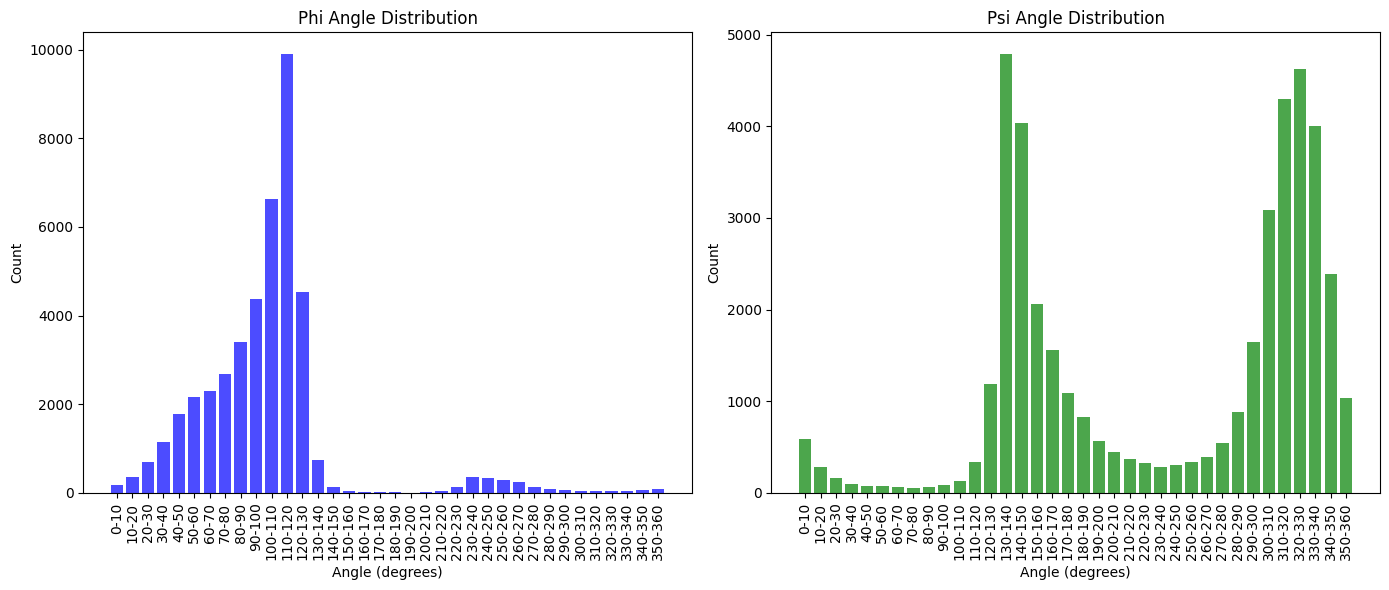

In [1]:
import json
import os 
from tqdm import tqdm
import numpy as np
from Bio import PDB
import pandas as pd
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
min_length = 0
phi_counts = [0] * 36  # 对应phi角的区间
psi_counts = [0] * 36  # 对应psi角的区间
total_counter = 0  # 统计处理的总蛋白质数量

def degrees(rad_angle) :
    """Converts any angle in radians to degrees.

    If the input is None, then it returns None.
    For numerical input, the output is mapped to [0,360]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / np.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle+180

file_path = '/data/private/jdp/PepGLAD/datasets/train_valid/all.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/train_valid/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue
    residues = list(chain.get_residues())
    if len(residues) < min_length:
        continue
    
    # 提取多肽链
    ppb = PDB.PPBuilder()
    polypeptides = ppb.build_peptides(chain)

    # 遍历每个多肽链的phi、psi二面角
    for poly in polypeptides:
        phi_psi_list = poly.get_phi_psi_list()  # 获取phi和psi角度列表
        for res_index, (phi, psi) in enumerate(phi_psi_list):
            if phi is not None and psi is not None:
                # 将角度转换为度
                phi_deg = degrees(phi)
                psi_deg = degrees(psi)
                
                # 计算phi和psi落在哪个区间（slut）
                phi_index = int(phi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                psi_index = int(psi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                
                # 更新对应区间的计数
                if 0 <= phi_deg < 360:
                    phi_counts[phi_index] += 1
                if 0 <= psi_deg < 360:
                    psi_counts[psi_index] += 1

file_path = '/data/private/jdp/PepGLAD/datasets/LNR/test.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/LNR/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue
    residues = list(chain.get_residues())
    if len(residues) < min_length:
        continue
    # 提取多肽链
    ppb = PDB.PPBuilder()
    polypeptides = ppb.build_peptides(chain)

    # 遍历每个多肽链的phi、psi二面角
    for poly in polypeptides:
        phi_psi_list = poly.get_phi_psi_list()  # 获取phi和psi角度列表
        for res_index, (phi, psi) in enumerate(phi_psi_list):
            if phi is not None and psi is not None:
                # 将角度转换为度
                phi_deg = degrees(phi)
                psi_deg = degrees(psi)
                
                # 计算phi和psi落在哪个区间（slut）
                phi_index = int(phi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                psi_index = int(psi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                
                # 更新对应区间的计数
                if 0 <= phi_deg < 360:
                    phi_counts[phi_index] += 1
                if 0 <= psi_deg < 360:
                    psi_counts[psi_index] += 1

# 打印结果
print(f"Total samples processed: {total_counter}")
print(f"Phi angle distribution: {phi_counts}")
print(f"Psi angle distribution: {psi_counts}")

# 可视化
bins = [f'{i*10}-{(i+1)*10}' for i in range(0, 36)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 绘制phi分布
ax1.bar(bins, phi_counts, color='b', alpha=0.7)
ax1.set_title("Phi Angle Distribution")
ax1.set_xlabel("Angle (degrees)")
ax1.set_ylabel("Count")
ax1.set_xticklabels(bins, rotation=90)

# 绘制psi分布
ax2.bar(bins, psi_counts, color='g', alpha=0.7)
ax2.set_title("Psi Angle Distribution")
ax2.set_xlabel("Angle (degrees)")
ax2.set_ylabel("Count")
ax2.set_xticklabels(bins, rotation=90)

plt.tight_layout()
plt.show()

Total samples processed: 130


/tmp/ipykernel_46275/4205481965.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bins, rotation=90)
/tmp/ipykernel_46275/4205481965.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bins, rotation=90)


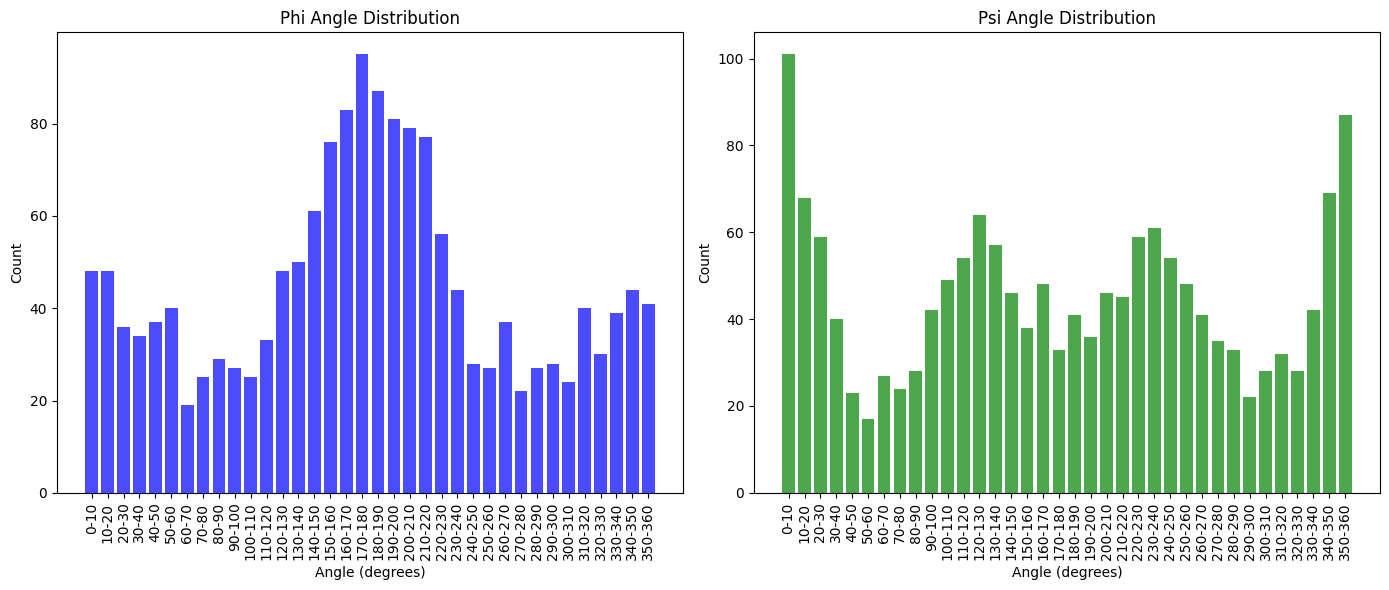

In [6]:
import json
import numpy as np
from Bio import PDB
import matplotlib.pyplot as plt
min_length = 13
# 文件夹路径
directory = '/home/jiangdapeng/PepGLAD/results/energy2_30/results.jsonl'

# 初始化计数器
phi_counts_new = [0] * 36  # 对应phi角的区间
psi_counts_new = [0] * 36  # 对应psi角的区间
total_counter = 0  # 统计处理的总蛋白质数量

def degrees(rad_angle) :
    """Converts any angle in radians to degrees.

    If the input is None, then it returns None.
    For numerical input, the output is mapped to [0,360]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / np.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle+180
# 解析文件
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            peptide_path = os.path.join('..',peptide_path)
            peptide = json_object['gen_seq']
            
            # 判断氨基酸序列长度
            if len(peptide) < min_length:
                continue
            
            total_counter += 1

            # 读取PDB文件
            parser = PDB.PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链

            # 提取多肽链
            ppb = PDB.PPBuilder()
            polypeptides = ppb.build_peptides(chain)

            # 遍历每个多肽链的phi、psi二面角
            for poly in polypeptides:
                phi_psi_list = poly.get_phi_psi_list()  # 获取phi和psi角度列表
                for res_index, (phi, psi) in enumerate(phi_psi_list):
                    if phi is not None and psi is not None:
                        # 将角度转换为度
                        phi_deg = degrees(phi)
                        psi_deg = degrees(psi)
                        
                        # 计算phi和psi落在哪个区间（slut）
                        phi_index = int(phi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                        psi_index = int(psi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                        
                        # 更新对应区间的计数
                        if 0 <= phi_deg < 360:
                            phi_counts_new[phi_index] += 1
                        if 0 <= psi_deg < 360:
                            psi_counts_new[psi_index] += 1

# 打印结果
print(f"Total samples processed: {total_counter}")
# print(f"Phi angle distribution: {phi_counts_new}")
# print(f"Psi angle distribution: {psi_counts_new}")

# 可视化
bins = [f'{i*10}-{(i+1)*10}' for i in range(0, 36)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 绘制phi分布
ax1.bar(bins, phi_counts_new, color='b', alpha=0.7)
ax1.set_title("Phi Angle Distribution")
ax1.set_xlabel("Angle (degrees)")
ax1.set_ylabel("Count")
ax1.set_xticklabels(bins, rotation=90)

# 绘制psi分布
ax2.bar(bins, psi_counts_new, color='g', alpha=0.7)
ax2.set_title("Psi Angle Distribution")
ax2.set_xlabel("Angle (degrees)")
ax2.set_ylabel("Count")
ax2.set_xticklabels(bins, rotation=90)

plt.tight_layout()
plt.show()



In [7]:
import numpy as np

def kl_divergence(P, Q):
    # 归一化
    P = np.array(P) / np.sum(P)
    Q = np.array(Q) / np.sum(Q)
    
    # 确保Q中没有零值
    epsilon = 1e-10
    P = P + epsilon
    Q = Q + epsilon
    
    # 计算KL散度
    return np.sum(P * np.log(P / Q))

# 计算KL散度
kl_div = kl_divergence(psi_counts+phi_counts, psi_counts_new+phi_counts_new)
print(f"KL Divergence: {kl_div}")

KL Divergence: 1.082232451746582
